### ex 6 + 곱 변수 생성2

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')

### train data 

In [2]:
import csv
train = pd.read_csv('train.csv')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.shape

(891, 12)

#### test data

In [6]:
test = pd.read_csv('test.csv')
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
test.shape

(418, 11)

In [10]:
# train 결측값
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# test 결측값
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### 데이터 분포

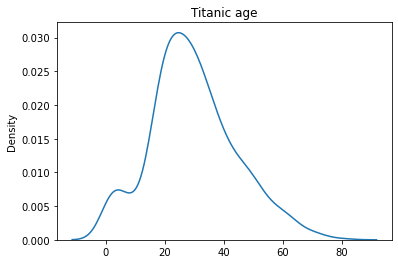

In [12]:
# Age



import seaborn as sns

x = train['Age'].values

sns.kdeplot(x)
plt.title('Titanic age')

plt.show()

# 커널 밀도함수 kernel density(kde)
# https://datascienceschool.net/01%20python/05.04%20%EC%8B%9C%EB%B3%B8%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%ED%8F%AC%20%EC%8B%9C%EA%B0%81%ED%99%94.html

In [13]:
# 시각화 할 때 좋을 것 같아
# https://steadiness-193.tistory.com/184

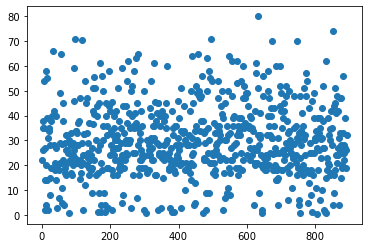

In [14]:
x = train['PassengerId'].values
y = train['Age'].values
plt.scatter(x,y)
plt.show()

In [15]:
# Age 편차
# 큰지 작은지 확인 불가
print(train['Age'].std())

14.526497332334044


In [16]:
# cabin 경우 값이 문자열이라 분포를 그리기 힘듬

In [17]:
# Embarked


# 결측값이 몇 개 없을 때, 최빈값만이 방법일까요?
# 문자열 -> 숫자형으로 만들어서 분포를 한 번 봅시다. 

train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [18]:
# z = df['Embarked'].values

#sns.distplot(z, kde=True, rug=True)
#plt.title('Titanic embarked')
#plt.show()

# ked(밀도), rug(위치) 동시 
# 곧 없어진다고 

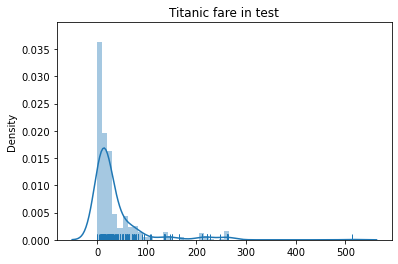

In [19]:
# fare

y1 = test['Fare'].values

sns.distplot(y1, kde=True, rug=True)
plt.title('Titanic fare in test')
plt.show()

#### 결측치 처리

Age -> 평균 29.69

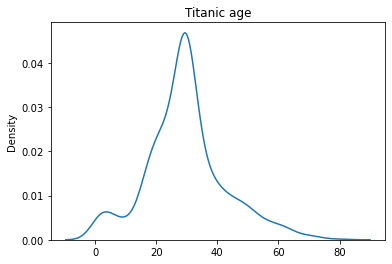

In [20]:
train['Age'] = train['Age'].fillna(29.69)     # train
test['Age'] = test['Age'].fillna(29.69)   # test

x = train['Age'].values

sns.kdeplot(x)
plt.title('Titanic age')

plt.show()

Embarked -> 최빈값 S(0)

In [21]:
train['Embarked'] = train['Embarked'].fillna('S')

Fare -> 평균 + log 

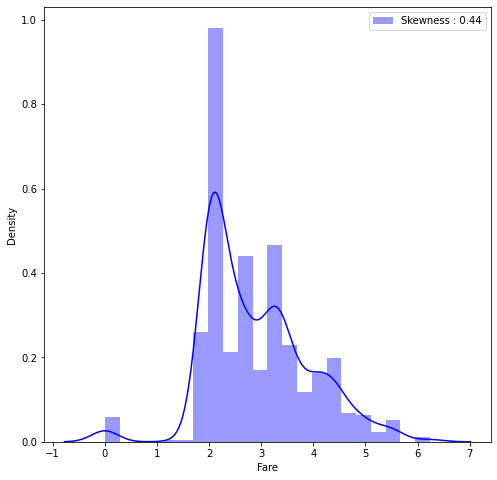

In [22]:
test['Fare'] = test['Fare'].fillna(train['Fare'].mean())

# 모델의 성능을 높일 수 있다. 

train['Fare'] = train['Fare'].apply(lambda x: np.log(x) if x > 0 else 0)
test['Fare'] = test['Fare'].apply(lambda x: np.log(x) if x > 0 else 0)

fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(train['Fare'],color='b',label='Skewness : {:.2f}'.format(train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

#### 새 변수 생성

In [23]:
# age_gr / married / f_nm / f_ox / fare_gr

Age > Age_gr

In [24]:
# 16세~ 성인 간주
# https://www.encyclopedia-titanica.org/community/threads/children-on-the-titanic.20096/

In [25]:
def age_gr(x):
    if x < 5 :
       return 'very young'
    if 5<=x<10:
       return 'young'
    if 10<=x<16:
       return 'children'
    if 16<=x<20:
       return 's_adult'    # 16세~ 성인 간주 
    if 20<=x<30:
       return '20s'
    if 30<=x<40:
       return '30s'
    if 40<=x<50:
       return '40s'
    if 50<=x<60:
       return '50s'
    if 60<=x<70:
       return '60s'
    if 70<=x<80:
       return '70s'
    if 80<=x<90:
       return '80s'


In [26]:
train['Age_gr'] = train['Age'].apply(lambda x:age_gr(x))
test['Age_gr'] = test['Age'].apply(lambda x:age_gr(x))

f_nm

In [27]:
train['F_nm'] = train['SibSp'] + train['Parch']
test['F_nm'] = test['SibSp'] + test['Parch']

f_ox

In [28]:
def f_ox(x):
    if x == 0:
        return 0
    if x >= 1:
        return 1   

In [29]:
train['F_ox'] = train['F_nm'].apply(lambda x: f_ox(x))
test['F_ox'] = test['F_nm'].apply(lambda x: f_ox(x))

Fare > Fare_gr

In [30]:
train['Fare'] = pd.qcut(train['Fare'], 5)
test['Fare'] = pd.qcut(test['Fare'], 5)

train['Fare'].value_counts()

(2.061, 2.351]     184
(3.076, 3.681]     180
(-0.001, 2.061]    179
(3.681, 6.239]     176
(2.351, 3.076]     172
Name: Fare, dtype: int64

In [31]:
train['Fare'] = train['Fare'].astype('category').cat.codes
test['Fare'] = test['Fare'].astype('category').cat.codes

train['Fare'].value_counts()

1    184
3    180
0    179
4    176
2    172
Name: Fare, dtype: int64

Name > Married

In [32]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_gr,F_nm,F_ox
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0,NaN,S,20s,1,1


In [33]:
train['Name'] = train['Name'].str.split(',').str[1]
train['Name'] = train['Name'].str.split('.').str[0]
train['Name'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [34]:
n = [' Don',' Rev', ' Mme',' Mlle', ' Col', ' Capt', ' the Countess', ' Jonkgeer']

for i in n:
    print(train[train['Name']==i]['Name'])

# 총 14명 

30     Don
Name: Name, dtype: object
149     Rev
150     Rev
249     Rev
626     Rev
848     Rev
886     Rev
Name: Name, dtype: object
369     Mme
Name: Name, dtype: object
641     Mlle
710     Mlle
Name: Name, dtype: object
647     Col
694     Col
Name: Name, dtype: object
745     Capt
Name: Name, dtype: object
759     the Countess
Name: Name, dtype: object
Series([], Name: Name, dtype: object)


In [35]:
condition = train['Name']==' Rev'
train[condition]

#  구글 영어번역 검색 '신부님'
# 실제 최소 27세~ 의 남성, sibsp/parch가 0~1명, 2class(?)
# 미혼으로.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_gr,F_nm,F_ox
149,150,0,2,Rev,male,42.0,0,0,244310,2,NaN,S,40s,0,0
150,151,0,2,Rev,male,51.0,0,0,S.O.P. 1166,2,NaN,S,50s,0,0
249,250,0,2,Rev,male,54.0,1,0,244252,3,NaN,S,50s,1,1
626,627,0,2,Rev,male,57.0,0,0,219533,2,NaN,Q,50s,0,0
848,849,0,2,Rev,male,28.0,0,1,248727,3,NaN,S,20s,1,1
886,887,0,2,Rev,male,27.0,0,0,211536,2,NaN,S,20s,0,0


In [36]:
# 미혼(0)
# Miss      미혼
# Master    미혼 남성(29살도 있음)
# Rev   신부님
# Mlle  미혼여성(마드모아젤) = Miss(프랑스 호)

# 기혼(1)
# Mr        기혼
# Mrs       기혼

In [37]:
# X 불명(9) -> 그 외.. 
# Don           도람뿌(남성형이름), 두목(?)
# Mme           N
# Col           N
# Capt          캡틴 1명, 기혼자임
# the Countess  백작부인(백작부인 자체는 직위인데 미/기혼 알 수X, 다만 이 사람은 이후에 결혼함)
# Jonkgeer      귀족직함 (가장 낮은 귀족직함) 결혼여부 불명
# Dr            박사
# Ms            기혼여부 상관없이
# Major         군대 직위
# Lady          당시 기혼자이나 귀족 출신 직위 중 1인듯함
# Sir           영국 준남작

In [38]:
test['Name'] = test['Name'].str.split(',').str[1]
test['Name'] = test['Name'].str.split('.').str[0]
test['Name'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Ms', ' Col', ' Rev', ' Dr',
       ' Dona'], dtype=object)

In [39]:
my = [' Mr', ' Mrs']
mn = [' Miss', ' Master', ' Rev', ' Mlle']

train['Married'] = train['Name'].apply(lambda x : 0 if x in my else 1 if x in mn else 9)  
test['Married'] = test['Name'].apply(lambda x : 0 if x in my else 1 if x in mn else 9)      

#### 문자열 -> 숫자형으로 인코딩

In [40]:
# sex / embarked / age_gr

# 원핫인코딩, 레이블 인코딩을 꼭 해줘야 하나? 탑승항구 한 것처럼 하기에는 좀 그런가..
# 원핫 인코딩으로 해주어야 하나? 
# 상관관계 산점도가 잘 안 보이는 느낌 

In [41]:
# sex, embarked 레이블 인코딩 
 
train['Sex'] = LabelEncoder().fit_transform(train.Sex)  # 0 여성 / 1 남성 
test['Sex'] = LabelEncoder().fit_transform(test.Sex)

train['Embarked'] = LabelEncoder().fit_transform(train.Embarked)
test['Embarked'] = LabelEncoder().fit_transform(test.Embarked)

train['Age_gr'] = LabelEncoder().fit_transform(train.Age_gr)
test['Age_gr'] = LabelEncoder().fit_transform(test.Age_gr)
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_gr,F_nm,F_ox,Married
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,0,NaN,2,0,1,1,0
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,4,C85,0,1,1,1,0
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,1,NaN,2,0,0,0,1
3,4,1,1,Mrs,0,35.0,1,0,113803,4,C123,2,1,1,1,0
4,5,0,3,Mr,1,35.0,0,0,373450,1,NaN,2,1,0,0,0


#### 필요없는 변수 drop

In [42]:
# cabin, ticket, Name, Age, SibSp, Parch

train = train.drop(['PassengerId', 'SibSp', 'Parch', 'Cabin', 'Ticket', 'Name','Age'], axis=1)
test = test.drop(['Cabin', 'SibSp', 'Parch','Ticket','Name', 'Age'], axis=1)

In [43]:
train.head()

,Survived,Pclass,Sex,Fare,Embarked,Age_gr,F_nm,F_ox,Married
0,0,3,1,0,2,0,1,1,0
1,1,1,0,4,0,1,1,1,0
2,1,3,0,1,2,0,0,0,1
3,1,1,0,4,2,1,1,1,0
4,0,3,1,1,2,1,0,0,0


In [44]:
test.head()

,PassengerId,Pclass,Sex,Fare,Embarked,Age_gr,F_nm,F_ox,Married
0,892,3,1,1,1,1,0,0,0
1,893,3,0,0,2,2,1,1,0
2,894,2,1,1,1,4,0,0,0
3,895,3,1,1,2,0,0,0,0
4,896,3,0,2,2,0,2,1,0


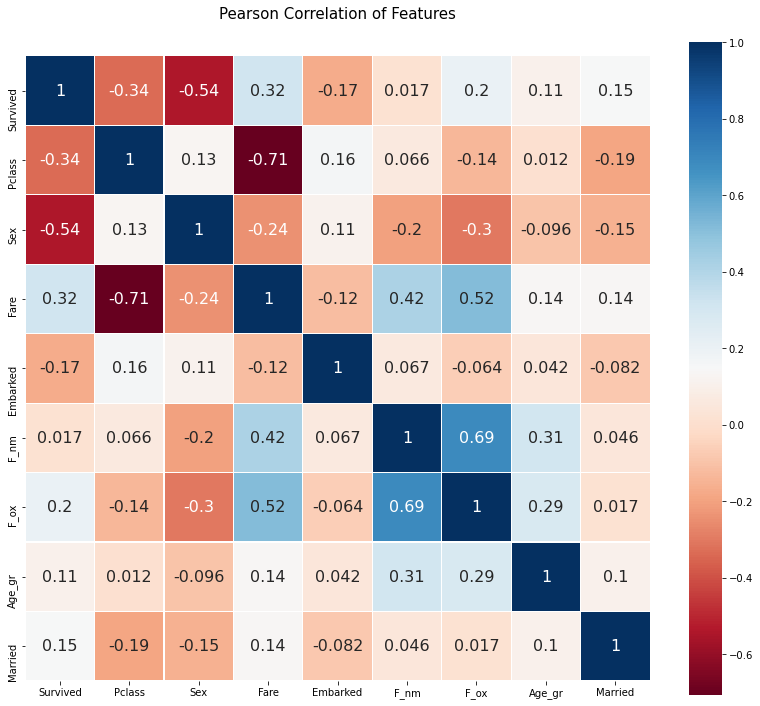

In [45]:
heatmap_data = train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'F_nm', 'F_ox', 'Age_gr', 'Married']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

In [46]:
# 곱 변수 생성 

def pclass(x):
    if x == 3:
        return 1
    if x == 2:
        return 2
    if x ==1 :
        return 3

def sex(x):
    if x ==1:
        return 1
    if x ==0:
        return 2

def fare(x):
    if x == 1:
        return 1
    if x == 0:
        return 2
    if x ==2 :
        return 3
    if x ==3:
        return 4
    if x ==4:
        return 5

In [47]:
train['Pclass'] = train['Pclass'].apply(lambda x: pclass(x))
test['Pclass'] = test['Pclass'].apply(lambda x: pclass(x))

train['Sex'] = train['Sex'].apply(lambda x: sex(x))
test['Sex'] = test['Sex'].apply(lambda x: sex(x))

train['Fare'] = train['Fare'].apply(lambda x: fare(x))
test['Fare'] = test['Fare'].apply(lambda x: fare(x))

In [48]:
train['pclass_sex'] =train['Pclass']*train['Sex']
test['pclass_sex'] =test['Pclass']*test['Sex']

train['pclass_fare'] =train['Pclass']*train['Fare']
test['pclass_fare'] =test['Pclass']*test['Fare']

train['sex_fare'] =train['Sex']*train['Fare']
test['sex_fare'] =test['Sex']*test['Fare']

train['pclass_sex_fare'] = train['Pclass']*train['Sex']*train['Fare']
test['pclass_sex_fare'] = test['Pclass']*test['Sex']*test['Fare']

In [49]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'Age_gr', 'F_nm',
       'F_ox', 'Married', 'pclass_sex', 'pclass_fare', 'sex_fare',
       'pclass_sex_fare'],
      dtype='object')

In [50]:
train = train.drop(['Embarked', 'F_nm', 'Age_gr', 'Married'], axis=1)
test = test.drop(['Embarked', 'F_nm', 'Age_gr', 'Married'], axis=1)

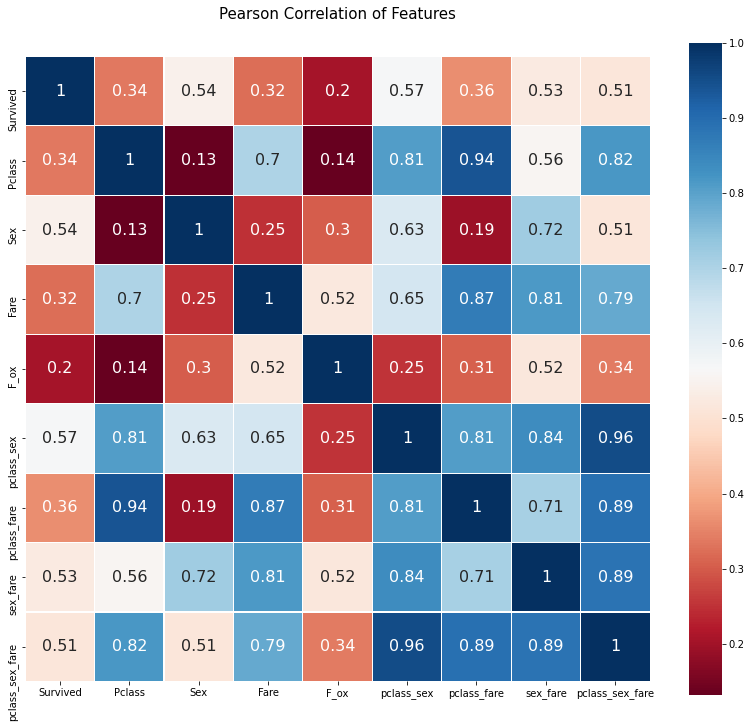

In [51]:
heatmap_data = train[['Survived', 'Pclass', 'Sex', 'Fare','F_ox', 'pclass_sex', 'pclass_fare', 'sex_fare','pclass_sex_fare']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

#### 변수 간 관계

In [52]:
# sns.pairplot(train,diag_kind='hist')
# plt.show()

In [53]:
# import warnings 
# warnings.filterwarnings('ignore')

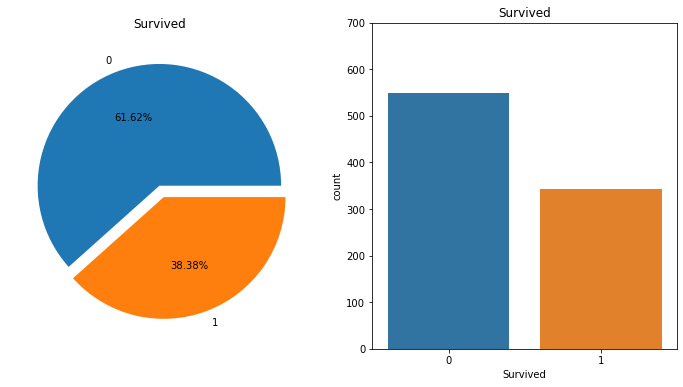

In [54]:
f,ax=plt.subplots(1,2,figsize=(12,6))

train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.ylim(0,700)
plt.show()

ValueError: Could not interpret input 'Embarked'

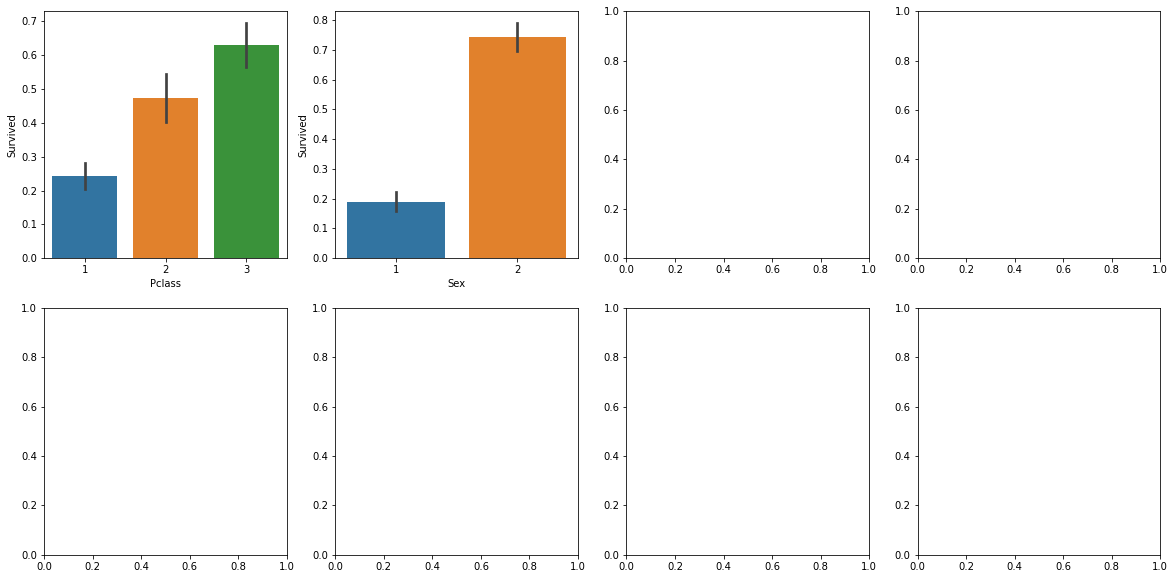

In [55]:
# 변수별 평균 생존률

fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4)
fig.set_size_inches(20,10)

sns.barplot(x='Pclass', y='Survived',data= train, ax=ax1)
sns.barplot(x='Sex', y='Survived',data= train, ax=ax2)
sns.barplot(x='Embarked', y='Survived',data= train, ax=ax3)
sns.barplot(x='Age_gr', y='Survived',data= train, ax=ax4)
sns.barplot(x='F_nm', y='Survived',data= train, ax=ax5)
sns.barplot(x='F_ox', y='Survived',data= train, ax=ax6)
sns.barplot(x='Married', y='Survived',data= train, ax=ax7)
sns.barplot(x='Fare', y='Survived', data= train, ax=ax8)

ax1.set(xlabel='')
ax2.set(xlabel='')
ax3.set(xlabel='')
ax4.set(xlabel='')
ax5.set(xlabel='')
ax6.set(xlabel='')
ax7.set(xlabel='')
ax8.set(xlabel='')

ax1.set(title="Pclass")
ax2.set(title="Sex")
ax3.set(title="Embarked")
ax4.set(title="Age_gr")
ax5.set(title="F_nm")
ax6.set(title="F_ox")
ax7.set(title="Married")
ax8.set(title='Fare')



In [ ]:
# sharey=True : y축 동일화 

#### 분류 모델

In [56]:
train['Survived'].unique()

array([0, 1], dtype=int64)

train, test split

In [57]:
X = train.iloc[:,1:].values
y = train['Survived']
X.shape, y.shape

((891, 8), (891,))

In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [59]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [60]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.8

In [61]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,1.419983
4,pclass_sex,1.212340
2,Fare,0.448016
3,F_ox,0.137602
7,pclass_sex_fare,0.108788
5,pclass_fare,-0.051704
6,sex_fare,-0.414441
0,Pclass,-0.929899


In [62]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

81.03

In [63]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

78.79

In [64]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

73.85

In [65]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree
# 76315

81.37

In [69]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest
# 77033

81.37

In [67]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)
xgb.score(X_train, Y_train)
acc_xgb = round(xgb.score(X_train, Y_train) * 100, 2)
acc_xgb
# 77751

[06:13:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


81.37

In [70]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('ex6_18r.csv', index=False)

In [ ]:
# 1. base  
# dtree : 95.17 / 76315
# rfc : 95.17 / 77033
# xgb : 93.83 / 77751

# 6. Fare (qcut=6)
# corr 0.26 -> 0.32
# xgv : 90.35 / 77990 > fix 

# ex6. fare 결측 평균 + log + qcut(6)
# xgb 90.35 > 78468

# ex6_18 
# xgb 81.37 / 78468 
# rfc 81.37 / 77990 